In [1]:
import wradlib as wrl
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

from osgeo import osr

import pickle

import pyart

import numpy as np


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
fname_shp = r'C:\Users\iac6311\Documents\Work\Data\GIS\CHI_shps\City_lumped.shp'

In [3]:

from matplotlib.collections import PatchCollection
from matplotlib.colors import from_levels_and_colors
import matplotlib.patches as patches

In [4]:
dataset, inLayer = wrl.io.open_vector(fname_shp)
borders, keys = wrl.georef.get_vector_coordinates(inLayer, key='name')

In [5]:
# Getting back the objects:
with open('radar_grid.pkl','rb') as f:  # Python 3: open(..., 'rb')
    x_rad, y_rad = pickle.load(f)

In [8]:
proj_wgs = osr.SpatialReference()
proj_wgs.ImportFromEPSG(4326)

proj_IL = osr.SpatialReference()
proj_IL.ImportFromEPSG(26771)

0

In [32]:
grid_xy = np.zeros((300,300,2))

In [33]:
grid_xy[:,:,0] = x_rad
grid_xy[:,:,1] = y_rad

In [34]:
grid_xy.shape

(300, 300, 2)

In [37]:
# transform radolan polar stereographic projection to GK2
xy = wrl.georef.reproject(grid_xy,
                          projection_source=proj_wgs,
                          projection_target=proj_IL)

In [40]:
zd = wrl.zonalstats.ZonalDataPoint(xy, borders, srs=proj_IL, buf=500.)

RuntimeError: JSON parsing error: unexpected character (at offset 34)

In [7]:
data, attrs = wrl.io.from_hdf5('output/gridded_KLOT20130417_140000.hdf5')

# # Getting back the objects:
# with open('radarparams.pkl','rb') as f:  # Python 3: open(..., 'rb')
#     sitecoords, az, r = pickle.load(f)

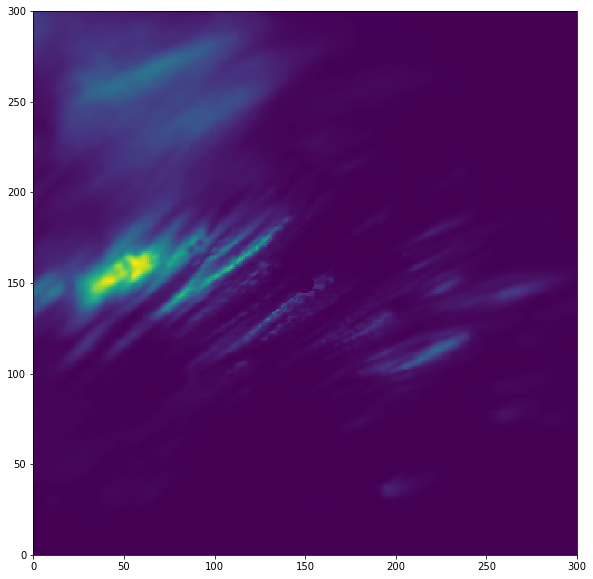

In [9]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, aspect='equal')
#wrl.vis.plot_ppi(data,r=r, az=az, site=sitecoords,proj=proj_wgs, vmin=0, vmax=20, cmap=pyart.graph.cm_colorblind.HomeyerRainbow,ax=ax)
#wrl.vis.add_lines(ax, borders, color='black', lw=2, zorder=4)
plt.pcolormesh(data)
#plt.xlim(-88,-87.5)
#plt.ylim(41.4,42.2)

In [10]:
grdverts = wrl.zonalstats.grid_centers_to_vertices(x_rad,
                                                   y_rad, 1.,
                                                   1.)

In [15]:
# Create instance of type ZonalDataPoly from source grid and
# catchment array
zd = wrl.zonalstats.ZonalDataPoly(grdverts, borders, srs=proj_wgs)

RuntimeError: JSON parsing error: unexpected character (at offset 34)

In [10]:
# coords, rad = wrl.georef.spherical_to_xyz(polargrid[0], polargrid[1],
#                                           elevation, radar_location)
# x = coords[..., 0]
# y = coords[..., 1]

# xgrid = np.linspace(x.min(), x.mean(), 100)
# ygrid = np.linspace(y.min(), y.mean(), 100)
# grid_xy = np.meshgrid(xgrid, ygrid)
# grid_xy = np.vstack((grid_xy[0].ravel(), grid_xy[1].ravel())).transpose()

# xy=np.concatenate([x.ravel()[:,None],y.ravel()[:,None]], axis=1)
# gridded = wrl.comp.togrid(xy, grid_xy, 460000., np.array([x.mean(), y.mean()]), data.ravel(), wrl.ipol.Nearest)
# gridded = np.ma.masked_invalid(gridded).reshape((len(xgrid), len(ygrid)))


# # Reduce grid size using a bounding box (to enhancing performance)
# bbox = inLayer.GetExtent()
# buffer = 5000.
# bbox = dict(left=bbox[0] - buffer, right=bbox[1] + buffer,
#             bottom=bbox[2] - buffer, top=bbox[3] + buffer)
# mask = (((xy[..., 1] > bbox['bottom']) & (xy[..., 1] < bbox['top'])) &
#         ((xy[..., 0] > bbox['left']) & (xy[..., 0] < bbox['right'])))
# xy_ = np.vstack((xy[..., 0][mask].ravel(), xy[..., 1][mask].ravel())).T
# data_ = data[mask]

In [ ]:
# Create instance of type ZonalDataPoint from source grid and
# catchment array
zd = wrl.zonalstats.ZonalDataPoint(xy_, borders, srs=proj_gk, buf=500.)
# dump to file (for later use - see below)
zd.dump_vector('test_zonal_points_cart')
# Create instance of type ZonalStatsPoint from zonal data object
obj1 = wrl.zonalstats.ZonalStatsPoint(zd)